In [1]:
import pandas as pd, requests

In [2]:
import os 
import logging
from typing import Dict, Tuple, List

In [177]:
import operator
from datetime import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

In [4]:
cities = ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille","Strasbourg",
          "Chateau du Haut Koenigsbourg","Colmar","Eguisheim","Besancon","Dijon","Annecy","Grenoble","Lyon",
          "Gorges du Verdon","Bormes les Mimosas","Cassis","Marseille","Aix en Provence","Avignon","Uzes","Nimes",
          "Aigues Mortes","Saintes Maries de la mer","Collioure","Carcassonne","Ariege","Toulouse","Montauban",
          "Biarritz","Bayonne","La Rochelle"]

In [5]:
cities_red = ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille"]

## Retrieve citie's coordinates

In [15]:
'''
    Retrieves location data of a city in a dictionary.  The data retrieved is:
      place_id': 256949255,
     'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
     'osm_type'
     'osm_id'
     'boundingbox': ['48.6119741', '48.637031', '-1.5495487', '-1.5094805'],
     'lat': 
     'lon': 
     'display_name': 'Le Mont-Saint-Michel, Avranches, Manche, Normandie, France métropolitaine, 50170, France',
     'place_rank': 16,
     'category': 'boundary',
     'type': 'administrative',
     'importance': 
     'icon':
    -----------------------------
    Parameters
    -----------------------------
    city: The city name
    
'''
def retrieve_one_city(city:str)->dict:
    url = f'https://nominatim.openstreetmap.org/search?country=France&format=jsonv2&class=boundary&limit=1&city={city}'
    result = requests.get(url)
    try:
        print(f'API nominatim response : {result} ')
        return result.json()[0]
    except IndexError as error:
        print('There is no result in the query')
        return None

In [14]:
url ='https://nominatim.openstreetmap.org/status.php'
result = requests.get(url)
print(result)


<Response [200]>


In [16]:
def retrieve_cities(city_names)->list:
    retrieved_cities = list()
    for city in city_names:
        print(f'Retrieving coordinates from {city} ...')
        data = retrieve_one_city(city) #city_data is a dictionary
        if data is not None:
            city_dict = {'place': city, **data} ## ** used to unpack the elements of the dictionary
            retrieved_cities.append(city_dict)   
        else:
            break
    return retrieved_cities

In [17]:
retrieved_cities=retrieve_cities(cities_red)

Retrieving coordinates from Mont Saint Michel ...
API nominatim response : <Response [200]> 
Retrieving coordinates from St Malo ...
API nominatim response : <Response [200]> 
Retrieving coordinates from Bayeux ...
API nominatim response : <Response [200]> 
Retrieving coordinates from Le Havre ...
API nominatim response : <Response [200]> 
Retrieving coordinates from Rouen ...
API nominatim response : <Response [200]> 
Retrieving coordinates from Paris ...
API nominatim response : <Response [200]> 
Retrieving coordinates from Amiens ...
API nominatim response : <Response [200]> 
Retrieving coordinates from Lille ...
API nominatim response : <Response [200]> 


In [18]:
len(retrieved_cities)

8

### Put retrieved cities in a data frame

In [19]:
cities_df = pd.DataFrame(retrieved_cities)

In [21]:
cities_df.head()

,place,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,place_rank,category,type,importance,icon
0,Mont Saint Michel,258697296,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,376823,"[48.6119741, 48.637031, -1.5495487, -1.5094805]",48.6355232,-1.5102571,"Le Mont-Saint-Michel, Avranches, Manche, Norma...",16,boundary,administrative,0.961274,https://nominatim.openstreetmap.org/ui/mapicon...
1,St Malo,257985771,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,905534,"[48.5979853, 48.6949736, -2.0768518, -1.9367259]",48.649518,-2.0260409,"Saint-Malo, Ille-et-Vilaine, Bretagne, France ...",16,boundary,administrative,0.786467,https://nominatim.openstreetmap.org/ui/mapicon...
2,Bayeux,257654882,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,145776,"[49.2608124, 49.2934736, -0.7275671, -0.6757378]",49.2764624,-0.7024738,"Bayeux, Calvados, Normandie, France métropolit...",16,boundary,administrative,0.792700,https://nominatim.openstreetmap.org/ui/mapicon...
3,Le Havre,256418097,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,104492,"[49.4516697, 49.5401463, 0.0667992, 0.1955556]",49.4938975,0.1079732,"Le Havre, Seine-Maritime, Normandie, France mé...",16,boundary,administrative,0.932333,https://nominatim.openstreetmap.org/ui/mapicon...
4,Rouen,303984676,"Data © OpenStreetMap contributors, ODbL 1.0. h...",relation,75628,"[49.4172001, 49.4652601, 1.0300648, 1.1521157]",49.4404591,1.0939658,"Rouen, Seine-Maritime, Normandie, France métro...",16,boundary,administrative,0.860073,https://nominatim.openstreetmap.org/ui/mapicon...


### Save cities dataframe in a file

In [22]:
cities_df.to_csv('./data/cities.csv', sep='\t')

In [23]:
coords = list(zip(cities_df.lat.to_list(), cities_df.lon.to_list()))

In [24]:
coords

[('48.6355232', '-1.5102571'),
 ('48.649518', '-2.0260409'),
 ('49.2764624', '-0.7024738'),
 ('49.4938975', '0.1079732'),
 ('49.4404591', '1.0939658'),
 ('48.8566969', '2.3514616'),
 ('49.8941708', '2.2956951'),
 ('50.6365654', '3.0635282')]

## Getting the weather

In [25]:
class City:
    def __init__(self, place_id, name, coords:tuple):
        self._place_id=place_id
        self._name=name
        self._coords=coords
        self._scrapped = {}
    
    @property
    def place_id(self):
        return self._place_id
    @property
    def name(self):
        return self._name
    
    @property
    def coords(self):
        return self._coords
    @property
    def scrapped(self):
        return self._scrapped
        
    @scrapped.setter
    def scrapped(self,value:dict):
        self._scrapped=value
    
    @staticmethod
    def from_dataframe(dataframe: pd.DataFrame):
        #TODO Check first if it contains the columns we need
        cities=list()
        try:
            for index_row in range(0,dataframe.shape[0]):
                place_id = str(dataframe.loc[index_row, 'place_id'])
                coords = (dataframe.loc[index_row, 'lat'], dataframe.loc[index_row, 'lon'])
                name = dataframe.loc[index_row, 'place']
                city = City(place_id, name, coords)
                cities.append(city)
        except KeyError as keyerr:
            print('The dataframe doesn''t have all required keys')
            return None
        else:
            return cities
        
    def __str__(self):
        return f'city:{self.name} place_id:{self.place_id} coords:{self.coords} scrapped:{self.scrapped}'

In [26]:
cities_list = City.from_dataframe(cities_df)

In [27]:
def get_weather(cities:List[City]):
    api_key='662b304886186ebe717af2be19cb4764'
    units='metric'
    part='minutely,hourly'
    for city in cities:
        lat=city.coords[0]
        lon=city.coords[1]
        url = f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={api_key}&units={units}'
        r = requests.get(url)
        city.scrapped=r.json()

### Create a list of objects City

In [28]:
def add_place_to_dict(city:City):
    city.scrapped['place_id']=city.place_id
    city.scrapped['current']['place_id'] = city.place_id
    city.scrapped['place']=city.name
     #data['place_id'] = place_id

In [29]:
def add_place_to_list(city:City):
    '''
    Retrieves the forecast list from the scrapped data and adds the place_id to each dictionary in the list.
    '''
    for day_dict in city.scrapped['daily']: #city.scrapped['daily'] contains a list. Each element is a dict.
        day_dict['place_id']=city.place_id 
        day_dict['place']=city.name
    

In [30]:
'''
    From a city containing scrapped data, it transforms the scrapped data in a pandas.Dataframe
'''
def process_city(city: City)->pd.DataFrame:
    add_place_to_dict(city)
    add_place_to_list(city)
    current_df = pd.DataFrame(city.scrapped['current'])
    forcast_df = pd.DataFrame(city.scrapped['daily'])
    return pd.concat([current_df,forcast_df], ignore_index=True)


In [31]:
city = cities_list[0]


### Launch the weather retrieval for all cities

In [32]:
get_weather(cities_list)

In [33]:
df_list = list()
for city in cities_list:
    df_list.append(process_city(city))    

In [34]:
final_df = pd.concat(df_list, ignore_index=True)

In [35]:
final_df.shape

(72, 22)

In [36]:
final_df.to_csv('./data/weather.csv', sep='\t')

In [41]:
def transform_to_datetime(dataframe, cols):
    #cols=['dt', 'sunrise', 'sunset']
    for col_name in cols:
        dataframe[col_name] = dataframe[col_name].apply(lambda x: dt.fromtimestamp(x))    

In [42]:
def transform_to_date(dataframe: pd.DataFrame, cols):
    for col_name in cols:
        dataframe[col_name] = dataframe[col_name].apply(lambda x: dt.fromtimestamp(x).replace(hour=0, minute=0, second=0))

In [43]:
transform_to_datetime(final_df, ['sunrise', 'sunset'])

In [44]:
transform_to_date(final_df, ['dt'])

In [47]:
final_df.head()

,dt,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,...,wind_deg,wind_gust,weather,place_id,moonrise,moonset,moon_phase,pop,place,rain
0,2021-09-01,2021-09-01 07:23:23,2021-09-01 20:49:06,14.16,13.88,1027,86,11.85,0.38,16,...,57,11.07,"{'id': 801, 'main': 'Clouds', 'description': '...",258697296,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-01,2021-09-01 07:23:23,2021-09-01 20:49:06,"{'day': 22.76, 'min': 13.84, 'max': 24.33, 'ni...","{'day': 22.34, 'night': 13.92, 'eve': 18.67, '...",1025,48,10.85,5.07,11,...,46,13.36,"[{'id': 801, 'main': 'Clouds', 'description': ...",258697296,1.630451e+09,1.630512e+09,0.81,0.00,Mont Saint Michel,NaN
2,2021-09-02,2021-09-02 07:24:47,2021-09-02 20:47:04,"{'day': 24.43, 'min': 11, 'max': 26.47, 'night...","{'day': 23.97, 'night': 15.71, 'eve': 21.04, '...",1021,40,9.91,5.26,1,...,49,13.54,"[{'id': 800, 'main': 'Clear', 'description': '...",258697296,1.630540e+09,1.630601e+09,0.85,0.00,Mont Saint Michel,NaN
3,2021-09-03,2021-09-03 07:26:11,2021-09-03 20:45:01,"{'day': 26.61, 'min': 13.12, 'max': 27.83, 'ni...","{'day': 26.61, 'night': 17.7, 'eve': 22.56, 'm...",1017,36,9.92,5.38,2,...,55,13.65,"[{'id': 800, 'main': 'Clear', 'description': '...",258697296,1.630630e+09,1.630690e+09,0.88,0.13,Mont Saint Michel,NaN
4,2021-09-04,2021-09-04 07:27:35,2021-09-04 20:42:57,"{'day': 25.35, 'min': 16.52, 'max': 25.35, 'ni...","{'day': 25.35, 'night': 19.21, 'eve': 22.63, '...",1013,54,15.14,5.06,62,...,289,8.60,"[{'id': 500, 'main': 'Rain', 'description': 'l...",258697296,1.630720e+09,1.630779e+09,0.91,0.84,Mont Saint Michel,3.2


In [50]:
final_df[['place_id','place','dt','temp']].head(10)

,place_id,place,dt,temp
0,258697296,NaN,2021-09-01,14.16
1,258697296,Mont Saint Michel,2021-09-01,"{'day': 22.76, 'min': 13.84, 'max': 24.33, 'ni..."
2,258697296,Mont Saint Michel,2021-09-02,"{'day': 24.43, 'min': 11, 'max': 26.47, 'night..."
3,258697296,Mont Saint Michel,2021-09-03,"{'day': 26.61, 'min': 13.12, 'max': 27.83, 'ni..."
4,258697296,Mont Saint Michel,2021-09-04,"{'day': 25.35, 'min': 16.52, 'max': 25.35, 'ni..."
5,258697296,Mont Saint Michel,2021-09-05,"{'day': 26.73, 'min': 16.49, 'max': 27.34, 'ni..."
6,258697296,Mont Saint Michel,2021-09-06,"{'day': 32.89, 'min': 18.78, 'max': 34.47, 'ni..."
7,258697296,Mont Saint Michel,2021-09-07,"{'day': 22.6, 'min': 18.76, 'max': 22.6, 'nigh..."
8,258697296,Mont Saint Michel,2021-09-08,"{'day': 19.2, 'min': 16.73, 'max': 20.01, 'nig..."
9,257985771,NaN,2021-09-01,14.15


In [172]:
def normalize_columns(dataframe:pd.DataFrame, columns:list())->pd.DataFrame:
    norm_list = list()# A list of DataFrames
    try:
        for col_name in columns:
            #Attention: json_normalize generates a dataframe with indexes starting at 0. 
            # If the input dataframe doesnt start at 0, the concat will not be well done.
            normalized_col = pd.json_normalize(dataframe[col_name]).rename(columns=lambda x: f'{col_name}_{x}')
            norm_list.append(normalized_col)
        normalized_df = pd.concat([dataframe.drop(columns, axis=1),*norm_list], axis=1)#Concatenates by index
        return normalized_df
    except KeyError as keyerr:
        print('Error, the columns were not normalized. One or more column names don''t exist in the DataFrame:', keyerr)
        raise KeyError

In [164]:
forecast_df = final_df.dropna(subset=['place'], axis=0).reset_index()

In [165]:
forecast_df = forecast_df[['dt', 'place_id', 'place', 'sunrise', 'sunset', 'temp', 'feels_like', 'pressure', 'humidity',
       'dew_point', 'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg',
       'wind_gust', 'weather', 'moonrise', 'moonset', 'moon_phase',
       'pop', 'rain']]

In [166]:
forecast_df[['place_id','place','dt','temp']].sample(5)

,place_id,place,dt,temp
6,258697296,Mont Saint Michel,2021-09-07,"{'day': 22.6, 'min': 18.76, 'max': 22.6, 'nigh..."
34,303984676,Rouen,2021-09-03,"{'day': 23.55, 'min': 11.92, 'max': 25.8, 'nig..."
25,256418097,Le Havre,2021-09-02,"{'day': 19.43, 'min': 11.8, 'max': 21.24, 'nig..."
33,303984676,Rouen,2021-09-02,"{'day': 21.07, 'min': 9.52, 'max': 23.63, 'nig..."
12,257985771,St Malo,2021-09-05,"{'day': 23.05, 'min': 17.16, 'max': 23.74, 'ni..."


In [167]:
forecast_df.head(3)

,dt,place_id,place,sunrise,sunset,temp,feels_like,pressure,humidity,dew_point,...,visibility,wind_speed,wind_deg,wind_gust,weather,moonrise,moonset,moon_phase,pop,rain
0,2021-09-01,258697296,Mont Saint Michel,2021-09-01 07:23:23,2021-09-01 20:49:06,"{'day': 22.76, 'min': 13.84, 'max': 24.33, 'ni...","{'day': 22.34, 'night': 13.92, 'eve': 18.67, '...",1025,48,10.85,...,NaN,8.42,46,13.36,"[{'id': 801, 'main': 'Clouds', 'description': ...",1.630451e+09,1.630512e+09,0.81,0.00,NaN
1,2021-09-02,258697296,Mont Saint Michel,2021-09-02 07:24:47,2021-09-02 20:47:04,"{'day': 24.43, 'min': 11, 'max': 26.47, 'night...","{'day': 23.97, 'night': 15.71, 'eve': 21.04, '...",1021,40,9.91,...,NaN,7.26,49,13.54,"[{'id': 800, 'main': 'Clear', 'description': '...",1.630540e+09,1.630601e+09,0.85,0.00,NaN
2,2021-09-03,258697296,Mont Saint Michel,2021-09-03 07:26:11,2021-09-03 20:45:01,"{'day': 26.61, 'min': 13.12, 'max': 27.83, 'ni...","{'day': 26.61, 'night': 17.7, 'eve': 22.56, 'm...",1017,36,9.92,...,NaN,6.16,55,13.65,"[{'id': 800, 'main': 'Clear', 'description': '...",1.630630e+09,1.630690e+09,0.88,0.13,NaN


In [168]:
forecast_df = normalize_columns(forecast_df, ['temp', 'feels_like'])

dataframe.shape = (64, 22)
normalized_col.shape: (64, 6)
normalized_col.shape: (64, 4)
normalized_df.shape = (64, 30)


In [169]:
forecast_df

,dt,place_id,place,sunrise,sunset,pressure,humidity,dew_point,uvi,clouds,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,2021-09-01,258697296,Mont Saint Michel,2021-09-01 07:23:23,2021-09-01 20:49:06,1025,48,10.85,5.07,11,...,22.76,13.84,24.33,14.22,19.06,13.99,22.34,13.92,18.67,13.74
1,2021-09-02,258697296,Mont Saint Michel,2021-09-02 07:24:47,2021-09-02 20:47:04,1021,40,9.91,5.26,1,...,24.43,11.00,26.47,15.92,21.38,11.01,23.97,15.71,21.04,10.59
2,2021-09-03,258697296,Mont Saint Michel,2021-09-03 07:26:11,2021-09-03 20:45:01,1017,36,9.92,5.38,2,...,26.61,13.12,27.83,17.97,22.86,13.27,26.61,17.70,22.56,13.03
3,2021-09-04,258697296,Mont Saint Michel,2021-09-04 07:27:35,2021-09-04 20:42:57,1013,54,15.14,5.06,62,...,25.35,16.52,25.35,19.08,22.54,16.52,25.35,19.21,22.63,16.63
4,2021-09-05,258697296,Mont Saint Michel,2021-09-05 07:28:58,2021-09-05 20:40:53,1014,42,12.33,4.66,89,...,26.73,16.49,27.34,21.33,23.32,16.58,26.76,21.03,23.25,16.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-09-04,256373580,Lille,2021-09-04 07:06:38,2021-09-04 20:27:19,1016,50,13.24,4.95,0,...,24.30,13.21,25.65,18.74,22.05,13.21,24.09,18.52,21.90,12.86
60,2021-09-05,256373580,Lille,2021-09-05 07:08:09,2021-09-05 20:25:07,1017,53,13.91,4.47,100,...,23.95,16.92,25.93,18.73,22.58,16.92,23.78,18.64,22.54,16.50
61,2021-09-06,256373580,Lille,2021-09-06 07:09:41,2021-09-06 20:22:54,1018,47,14.23,5.00,78,...,26.52,16.37,27.25,20.44,23.83,16.51,26.52,20.47,23.89,16.44
62,2021-09-07,256373580,Lille,2021-09-07 07:11:12,2021-09-07 20:20:41,1015,39,12.15,5.00,70,...,27.12,17.68,27.37,19.87,23.35,17.68,26.90,19.69,23.23,17.62


In [170]:
forecast_df[0:2]

,dt,place_id,place,sunrise,sunset,pressure,humidity,dew_point,uvi,clouds,...,temp_day,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn
0,2021-09-01,258697296,Mont Saint Michel,2021-09-01 07:23:23,2021-09-01 20:49:06,1025,48,10.85,5.07,11,...,22.76,13.84,24.33,14.22,19.06,13.99,22.34,13.92,18.67,13.74
1,2021-09-02,258697296,Mont Saint Michel,2021-09-02 07:24:47,2021-09-02 20:47:04,1021,40,9.91,5.26,1,...,24.43,11.00,26.47,15.92,21.38,11.01,23.97,15.71,21.04,10.59


In [231]:
def plot_temperature(forecast_df):
    plt.figure(figsize=(14,8))
    sns.lineplot(x='dt', y='temp_day', data=forecast_df, hue='place')
    plt.show()
#forecast_df.iloc[0:14]


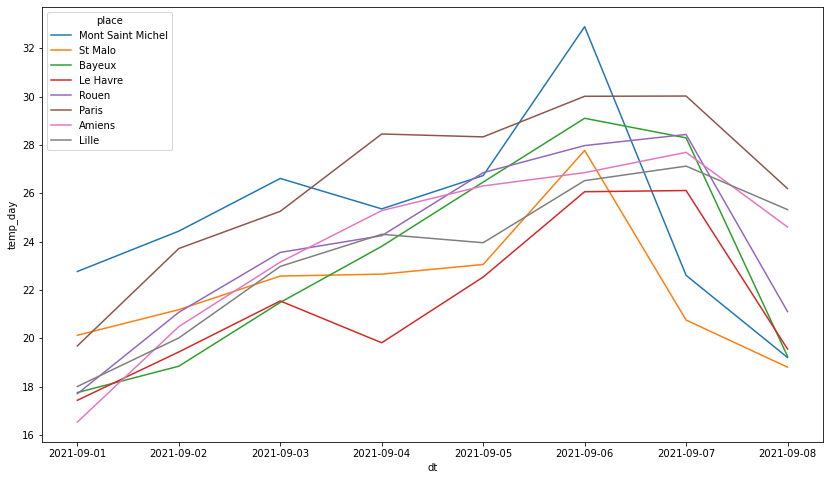

In [232]:
plot_temperature(forecast_df)

In [229]:
def top_5(dataframe:pd.DataFrame)->pd.DataFrame:
    df_ranks = dataframe.copy()
    df_ranks['ranking_day'] = forecast_df.groupby(['dt'])['temp_day'].rank(ascending=False)#Ranking per highest temp_day 
    #dataframe[['dt', 'place', 'temp_day', 'ranking_day']].sort_values(['dt', 'ranking_day'])
    top_5_cities = df_ranks.groupby('place_id')['ranking_day'].agg('mean').sort_values(ascending=False)[0:5]
    top5_df = df_ranks[df_ranks['place_id'].isin(top_5_cities.index.to_list())]
    print(top5_df.shape)
    return top5_df

In [234]:
top5 = top_5(forecast_df)
top5.head()

(40, 31)


,dt,place_id,place,sunrise,sunset,pressure,humidity,dew_point,uvi,clouds,...,temp_min,temp_max,temp_night,temp_eve,temp_morn,feels_like_day,feels_like_night,feels_like_eve,feels_like_morn,ranking_day
8,2021-09-01,257985771,St Malo,2021-09-01 07:25:26,2021-09-01 20:51:11,1026,63,12.43,4.97,28,...,14.15,20.84,15.52,18.35,14.26,19.83,15.29,18.09,14.17,2.0
9,2021-09-02,257985771,St Malo,2021-09-02 07:26:50,2021-09-02 20:49:08,1022,58,12.09,5.25,0,...,13.39,22.07,16.49,19.57,13.42,20.87,16.41,19.41,13.12,3.0
10,2021-09-03,257985771,St Malo,2021-09-03 07:28:14,2021-09-03 20:47:05,1018,57,12.82,5.38,2,...,15.05,23.12,17.67,20.55,15.18,22.37,17.66,20.46,15.05,6.0
11,2021-09-04,257985771,St Malo,2021-09-04 07:29:37,2021-09-04 20:45:01,1014,67,15.89,5.24,48,...,17.10,22.65,18.87,21.22,17.10,22.72,19.03,21.41,17.22,7.0
12,2021-09-05,257985771,St Malo,2021-09-05 07:31:01,2021-09-05 20:42:57,1014,58,13.38,4.86,90,...,17.16,23.74,19.93,20.47,17.20,22.93,19.99,20.58,17.06,7.0


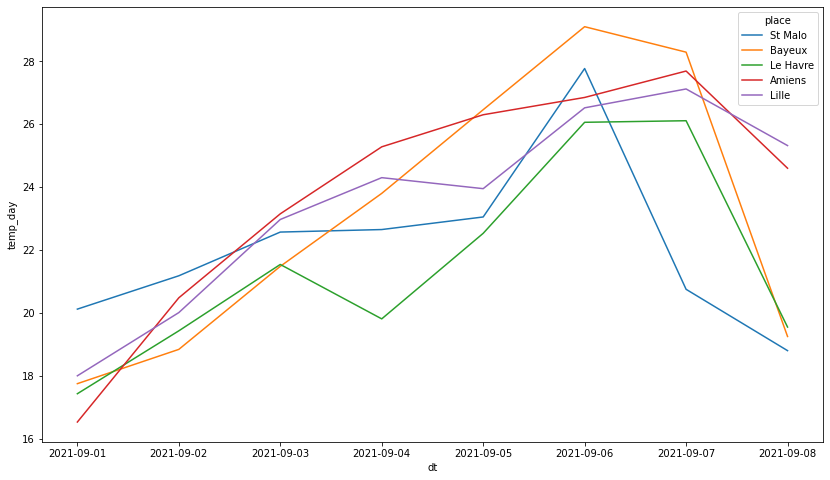

In [233]:
plot_temperature(top5)

In [199]:
forecast_df['ranking_day'] = forecast_df.groupby(['dt'])['temp_day'].rank(ascending=False)
#forecast_df['points_day'] = forecast_df['ranking_day']
forecast_df[['dt', 'place', 'temp_day', 'ranking_day']].sort_values(['dt', 'ranking_day'], ascending=[True, True])

,dt,place,temp_day,ranking_day
0,2021-09-01,Mont Saint Michel,22.76,1.0
8,2021-09-01,St Malo,20.12,2.0
40,2021-09-01,Paris,19.68,3.0
56,2021-09-01,Lille,18.00,4.0
16,2021-09-01,Bayeux,17.75,5.0
...,...,...,...,...
39,2021-09-08,Rouen,21.10,4.0
31,2021-09-08,Le Havre,19.55,5.0
23,2021-09-08,Bayeux,19.25,6.0
7,2021-09-08,Mont Saint Michel,19.20,7.0


In [210]:
forecast_df.groupby(['place_id','place'])['ranking_day'].agg('mean').sort_values(ascending=True)

place_id   place            
256305646  Paris                1.625
258697296  Mont Saint Michel    2.875
303984676  Rouen                3.750
259023929  Amiens               4.750
256373580  Lille                4.875
257654882  Bayeux               5.375
257985771  St Malo              5.750
256418097  Le Havre             7.000
Name: ranking_day, dtype: float64